In [24]:
import pandas as pd

# Specify the file path
file_path = 'C:/Users/abhyu/DHT11_20250208210724.csv'

# Load the data into a DataFrame
data = pd.read_csv(file_path)


In [29]:
# Check for missing values
print(data.isnull().sum())

# Remove rows with missing values
data = data.dropna()

# Prepare the data for Linear Regression
X = data['temperature'].values.reshape(-1, 1)  # Independent variable
y = data['humidity'].values  # Dependent variable

temperature    0
humidity       0
dtype: int64


In [30]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Display the slope and intercept
print(f"Slope: {model.coef_[0]}, Intercept: {model.intercept_}")

Slope: -0.7484724699119365, Intercept: 72.16278069972736


In [31]:
import numpy as np

# Get the range of temperatures
min_temp = data['temperature'].min()
max_temp = data['temperature'].max()

# Generate 100 equally spaced temperatures
test_temps = np.linspace(min_temp, max_temp, 100).reshape(-1, 1)

# Predict humidity for these temperatures
predicted_humidity = model.predict(test_temps)

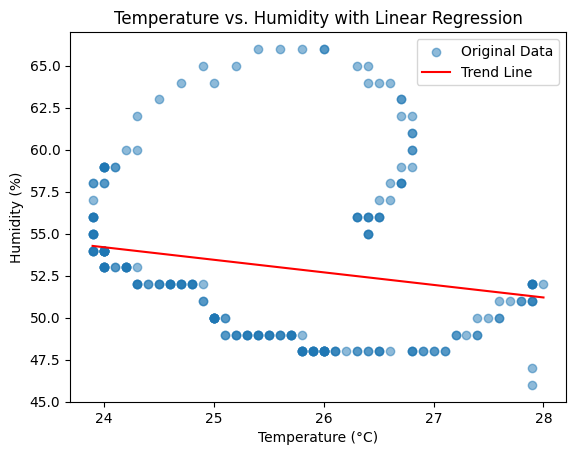

In [32]:
import matplotlib.pyplot as plt

# Scatter plot of original data
plt.scatter(data['temperature'], data['humidity'], label='Original Data', alpha=0.5)

# Plot the predicted trend line
plt.plot(test_temps, predicted_humidity, color='red', label='Trend Line')

# Add labels and legend
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity with Linear Regression')
plt.legend()

# Display the plot
plt.show()


In [33]:
# Calculate 5th and 95th percentiles
temp_5th = data['temperature'].quantile(0.05)
temp_95th = data['temperature'].quantile(0.95)

# Filter out outliers
filtered_data = data[(data['temperature'] >= temp_5th) & (data['temperature'] <= temp_95th)]

# Prepare filtered data
X_filtered = filtered_data['temperature'].values.reshape(-1, 1)
y_filtered = filtered_data['humidity'].values

# Retrain the model
model_filtered = LinearRegression()
model_filtered.fit(X_filtered, y_filtered)

# Generate test temperatures for filtered data
test_temps_filtered = np.linspace(filtered_data['temperature'].min(), filtered_data['temperature'].max(), 100).reshape(-1, 1)
predicted_humidity_filtered = model_filtered.predict(test_temps_filtered)

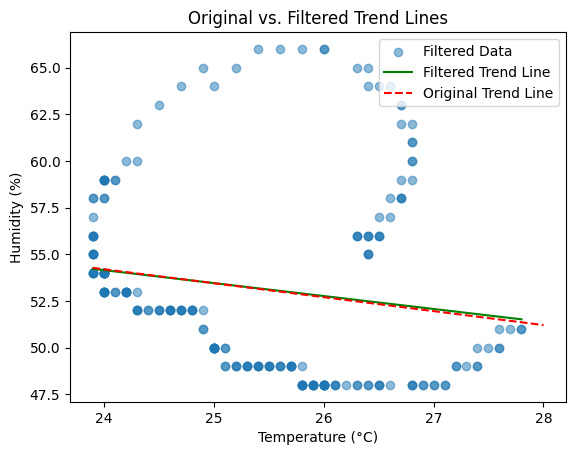

Original R²: 0.034731868507493435
Filtered R²: 0.024511887716821223


In [34]:
# Plot comparison
plt.scatter(filtered_data['temperature'], filtered_data['humidity'], label='Filtered Data', alpha=0.5)
plt.plot(test_temps_filtered, predicted_humidity_filtered, color='green', label='Filtered Trend Line')
plt.plot(test_temps, predicted_humidity, color='red', linestyle='--', label='Original Trend Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Original vs. Filtered Trend Lines')
plt.legend()
plt.show()

# Calculate and compare R-squared values
from sklearn.metrics import r2_score
original_r2 = r2_score(y, model.predict(X))
filtered_r2 = r2_score(y_filtered, model_filtered.predict(X_filtered))
print(f"Original R²: {original_r2}")
print(f"Filtered R²: {filtered_r2}")